

# Time Series for % Increasing Price

reference: 
- https://www.machinelearningplus.com/time-series/time-series-analysis-python/
- https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

# Import Libray and Open Data

In [93]:
import pandas as pd
import numpy as np
import random

In [94]:
df = pd.read_csv('Data/DC_Prop_Condominium_TimeSeries.csv', index_col = 'Unnamed: 0', parse_dates = ['SALEDATE'])
df.head(2)

,SALEDATE,PRICE
106696,2016-12-20,599900.0
106698,2017-02-22,677900.0


# Preprocessing

## Prepare Column

In [95]:
df = df.sort_values(by='SALEDATE', ascending= True)

In [96]:
df['YEAR'] = df['SALEDATE'].dt.year
df['SOURCE'] = 'Condominium'
df = df.rename_axis(None)

## Aggregate Price Per Year

In [97]:
df_c = pd.crosstab(index=df['YEAR'], 
            columns=[df['SOURCE']], 
            values=df['PRICE'],
            aggfunc='mean')
df_c = df_c.rename_axis(None)
df_c = df_c.reset_index()
df_c = df_c.rename(columns={'Condominium' : 'PRICE_AVG', 'index' : 'YEAR'})

In [98]:
df_c

SOURCE,YEAR,PRICE_AVG
0,1986,5.400000e+03
1,1988,8.050000e+04
2,1990,7.090000e+04
3,1992,1.405537e+05
4,1993,1.174504e+05
5,1994,1.273469e+05
6,1995,1.209522e+05
7,1996,1.201482e+05
8,1997,1.084103e+05
9,1998,1.227042e+05


## Repair Typo Price

In [99]:
df_c.iloc[0,1] = df_c.iloc[0,1] * 10

In [100]:
df_c.iloc[18,1] = df_c.iloc[18,1]/100

In [101]:
df_c.iloc[26,1] = df_c.iloc[26,1] /10

# Plot Price by Time Series

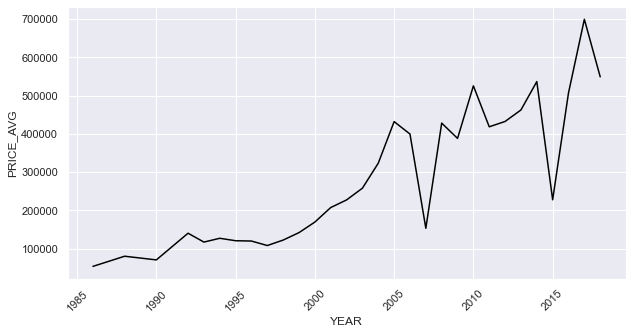

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,5))
sns.set_style("darkgrid")
sns.lineplot(x='YEAR', y='PRICE_AVG', data = df_c, color = 'black', legend='full', sizes= 1)

plt.xticks(rotation=45)
plt.show()

In [103]:
df_c

SOURCE,YEAR,PRICE_AVG
0,1986,54000.000000
1,1988,80500.000000
2,1990,70900.000000
3,1992,140553.722449
4,1993,117450.400000
5,1994,127346.851163
6,1995,120952.247525
7,1996,120148.214286
8,1997,108410.272727
9,1998,122704.174061


In [104]:
avg_percent_increase = np.median(percent_increase)*100
print("Average % Increase Price Per Year", avg_percent_increase, "%")

Average % Increase Price Per Year 16.43736078022836 %
